# Group 3:
<pre>  STT   Thành viên                     MSSV
  1.    Đoàn Thị Trâm                 20C29016
  2.    Nguyễn Thị Thu Thảo           20C29035
  3.    Phạm Thị Hồng Phụng           20C29033
  4.    Nguyễn Thanh Việt Cường       20C29018 
  5.    Nguyễn Thị Kim Hoàng          20C29022 <pre>

#1. How to enhance imbalanced data in classification problems when using Bagging

In [1]:
import warnings
warnings.filterwarnings("ignore")
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

%matplotlib inline

In [2]:
from sklearn.datasets import make_classification
from collections import Counter
from imblearn.over_sampling import RandomOverSampler, SMOTE, ADASYN, BorderlineSMOTE, SVMSMOTE
from imblearn.under_sampling import RandomUnderSampler, NearMiss, TomekLinks, EditedNearestNeighbours
from imblearn.pipeline import Pipeline

In [3]:
def model_resampling_pipeline(X_train, X_test, y_train, y_test, model):
    results = {'ordinary': {},
               'class_weight': {},
               'oversample': {},
               'undersample': {},
               'combination': {}}
    
    # ------ No balancing ------
    model.fit(X_train, y_train)
    predictions = model.predict(X_test)
    accuracy = metrics.accuracy_score(y_test, predictions)
    precision, recall, fscore, support = metrics.precision_recall_fscore_support(y_test, predictions)
    tn, fp, fn, tp = metrics.confusion_matrix(y_test, predictions).ravel()
    fpr, tpr, thresholds = metrics.roc_curve(y_test, predictions, pos_label=1)
    fpr_, tpr_, _ = metrics.roc_curve(y_test.ravel(), predictions.ravel(), pos_label=1)
    auc = metrics.auc(fpr, tpr)
    
    results['ordinary'] = {'accuracy': accuracy, 'precision': precision, 'recall': recall, 
                          'fscore': fscore, 'n_occurences': support,
                          'predictions_count': Counter(predictions),
                          'tp': tp, 'tn': tn, 'fp': fp, 'fn': fn,
                          'auc': auc,
                          'fpr':fpr_,
                          'tpr':tpr_}
    
    
    # ------ Class weight ------
    if 'class_weight' in model.get_params().keys():
        model.set_params(class_weight='balanced')
        model.fit(X_train, y_train)
        predictions = model.predict(X_test)
        accuracy = metrics.accuracy_score(y_test, predictions)
        precision, recall, fscore, support = metrics.precision_recall_fscore_support(y_test, predictions)
        tn, fp, fn, tp = metrics.confusion_matrix(y_test, predictions).ravel()
        fpr, tpr, thresholds = metrics.roc_curve(y_test, predictions, pos_label=1)
        fpr_, tpr_, _ = metrics.roc_curve(y_test.ravel(), predictions.ravel(), pos_label=1)
        auc = metrics.auc(fpr, tpr)

        results['class_weight'] = {'accuracy': accuracy, 'precision': precision, 'recall': recall, 
                                  'fscore': fscore, 'n_occurences': support,
                                  'predictions_count': Counter(predictions),
                                  'tp': tp, 'tn': tn, 'fp': fp, 'fn': fn,
                                  'auc': auc,
                                  'fpr':fpr_,
                                  'tpr':tpr_
                                   }

    
    # ------------ OVERSAMPLING TECHNIQUES ------------
    print('------ Oversampling methods ------')
    techniques = [RandomOverSampler(),
                  SMOTE(),
                  ADASYN(),
                  BorderlineSMOTE(),
                  SVMSMOTE()]
    
    for sampler in techniques:
        technique = sampler.__class__.__name__
        print(f'Technique: {technique}')
        print(f'Before resampling: {sorted(Counter(y_train).items())}')
        X_resampled, y_resampled = sampler.fit_resample(X_train, y_train)
        print(f'After resampling: {sorted(Counter(y_resampled).items())}')

        model.fit(X_resampled, y_resampled)
        predictions = model.predict(X_test)
        accuracy = metrics.accuracy_score(y_test, predictions)
        precision, recall, fscore, support = metrics.precision_recall_fscore_support(y_test, predictions)
        tn, fp, fn, tp = metrics.confusion_matrix(y_test, predictions).ravel()
        fpr, tpr, thresholds = metrics.roc_curve(y_test, predictions, pos_label=1)
        fpr_, tpr_, _ = metrics.roc_curve(y_test.ravel(), predictions.ravel(), pos_label=1)
        auc = metrics.auc(fpr, tpr)

        results['oversample'][technique] = {'accuracy': accuracy, 'precision': precision, 'recall': recall, 
                                            'fscore': fscore, 'n_occurences': support,
                                            'predictions_count': Counter(predictions),
                                            'tp': tp, 'tn': tn, 'fp': fp, 'fn': fn,
                                            'auc': auc,
                                            'fpr':fpr_,
                                            'tpr':tpr_}

    
    # ------------ UNDERSAMPLING TECHNIQUES ------------
    print('------ Undersampling methods ------')
    techniques = [RandomUnderSampler(),
                  NearMiss(version=1),
                  NearMiss(version=2),
                  NearMiss(version=3,),
                  TomekLinks(),
                  EditedNearestNeighbours()]
    
    for sampler in techniques:
        technique = sampler.__class__.__name__
        if technique == 'NearMiss': technique+=str(sampler.version)
        print(f'Technique: {technique}')
        print(f'Before resampling: {sorted(Counter(y_train).items())}')
        X_resampled, y_resampled = sampler.fit_resample(X_train, y_train)
        print(f'After resampling: {sorted(Counter(y_resampled).items())}')

        model.fit(X_resampled, y_resampled)
        predictions = model.predict(X_test)
        accuracy = metrics.accuracy_score(y_test, predictions)
        precision, recall, fscore, support = metrics.precision_recall_fscore_support(y_test, predictions)
        tn, fp, fn, tp = metrics.confusion_matrix(y_test, predictions).ravel()
        fpr, tpr, thresholds = metrics.roc_curve(y_test, predictions, pos_label=1)
        fpr_, tpr_, _ = metrics.roc_curve(y_test.ravel(), predictions.ravel(), pos_label=1)
        auc = metrics.auc(fpr, tpr)

        results['undersample'][technique] = {'accuracy': accuracy, 'precision': precision, 'recall': recall, 
                                              'fscore': fscore, 'n_occurences': support,
                                              'predictions_count': Counter(predictions),
                                              'tp': tp, 'tn': tn, 'fp': fp, 'fn': fn,
                                              'auc': auc,
                                              'fpr':fpr_,
                                              'tpr':tpr_}

    # ------------ COMBINATION TECHNIQUES ------------
    print('------ Combination methods ------')
    under = RandomUnderSampler(sampling_strategy=0.5)
    techniques = [SMOTE(sampling_strategy=0.1),
                  ADASYN(sampling_strategy=0.1),
                  BorderlineSMOTE(sampling_strategy=0.1),
                  SVMSMOTE(sampling_strategy=0.1)]
    
    for sampler in techniques:
        technique = 'under + ' + sampler.__class__.__name__
        print(f'Technique: {technique}')
        over = sampler
        steps = [('o',over),('u',under)]
        pipeline = Pipeline(steps=steps)
        print(f'Before resampling: {sorted(Counter(y_train).items())}')
        X_resampled, y_resampled = pipeline.fit_resample(X_train, y_train)
        print(f'After resampling: {sorted(Counter(y_resampled).items())}')

        model.fit(X_resampled, y_resampled)
        predictions = model.predict(X_test)
        accuracy = metrics.accuracy_score(y_test, predictions)
        precision, recall, fscore, support = metrics.precision_recall_fscore_support(y_test, predictions)
        tn, fp, fn, tp = metrics.confusion_matrix(y_test, predictions).ravel()
        fpr, tpr, thresholds = metrics.roc_curve(y_test, predictions, pos_label=1)
        fpr_, tpr_, _ = metrics.roc_curve(y_test.ravel(), predictions.ravel(), pos_label=1)
        auc = metrics.auc(fpr, tpr)

        results['combination'][technique] = {'accuracy': accuracy, 'precision': precision, 'recall': recall, 
                                          'fscore': fscore, 'n_occurences': support,
                                          'predictions_count': Counter(predictions),
                                          'tp': tp, 'tn': tn, 'fp': fp, 'fn': fn,
                                          'auc': auc,
                                          'fpr':fpr_,
                                          'tpr':tpr_}
    

    return results

## 1.1 Credit Card Fraud Detection

In [4]:
from sklearn.model_selection import train_test_split
from sklearn.decomposition import PCA
from sklearn import metrics

In [5]:
# 
URL = 'https://raw.githubusercontent.com/nsethi31/Kaggle-Data-Credit-Card-Fraud-Detection/master/creditcard.csv'
path = 'https://drive.google.com/uc?export=download&id='+URL.split('/')[-2]
data = pd.read_csv(URL)

In [6]:
data.head()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
0,0.0,-1.359807,-0.072781,2.536347,1.378155,-0.338321,0.462388,0.239599,0.098698,0.363787,...,-0.018307,0.277838,-0.110474,0.066928,0.128539,-0.189115,0.133558,-0.021053,149.62,0
1,0.0,1.191857,0.266151,0.166480,0.448154,0.060018,-0.082361,-0.078803,0.085102,-0.255425,...,-0.225775,-0.638672,0.101288,-0.339846,0.167170,0.125895,-0.008983,0.014724,2.69,0
2,1.0,-1.358354,-1.340163,1.773209,0.379780,-0.503198,1.800499,0.791461,0.247676,-1.514654,...,0.247998,0.771679,0.909412,-0.689281,-0.327642,-0.139097,-0.055353,-0.059752,378.66,0
3,1.0,-0.966272,-0.185226,1.792993,-0.863291,-0.010309,1.247203,0.237609,0.377436,-1.387024,...,-0.108300,0.005274,-0.190321,-1.175575,0.647376,-0.221929,0.062723,0.061458,123.50,0
4,2.0,-1.158233,0.877737,1.548718,0.403034,-0.407193,0.095921,0.592941,-0.270533,0.817739,...,-0.009431,0.798278,-0.137458,0.141267,-0.206010,0.502292,0.219422,0.215153,69.99,0


In [7]:
print(Counter(data['Class']))

Counter({0: 284315, 1: 492})


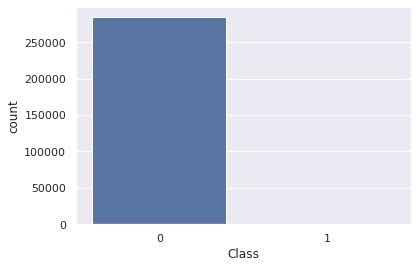

In [8]:
sns.set()
sns.countplot(x='Class', data=data)

In [9]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
data['Amount'] = scaler.fit_transform(data['Amount'].values.reshape(-1,1))
data = data.drop(['Time'], axis=1)
data.head()

,V1,V2,V3,V4,V5,V6,V7,V8,V9,V10,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
0,-1.359807,-0.072781,2.536347,1.378155,-0.338321,0.462388,0.239599,0.098698,0.363787,0.090794,...,-0.018307,0.277838,-0.110474,0.066928,0.128539,-0.189115,0.133558,-0.021053,0.244964,0
1,1.191857,0.266151,0.166480,0.448154,0.060018,-0.082361,-0.078803,0.085102,-0.255425,-0.166974,...,-0.225775,-0.638672,0.101288,-0.339846,0.167170,0.125895,-0.008983,0.014724,-0.342475,0
2,-1.358354,-1.340163,1.773209,0.379780,-0.503198,1.800499,0.791461,0.247676,-1.514654,0.207643,...,0.247998,0.771679,0.909412,-0.689281,-0.327642,-0.139097,-0.055353,-0.059752,1.160686,0
3,-0.966272,-0.185226,1.792993,-0.863291,-0.010309,1.247203,0.237609,0.377436,-1.387024,-0.054952,...,-0.108300,0.005274,-0.190321,-1.175575,0.647376,-0.221929,0.062723,0.061458,0.140534,0
4,-1.158233,0.877737,1.548718,0.403034,-0.407193,0.095921,0.592941,-0.270533,0.817739,0.753074,...,-0.009431,0.798278,-0.137458,0.141267,-0.206010,0.502292,0.219422,0.215153,-0.073403,0


In [10]:
X = data.iloc[:,:-1]
y = data.iloc[:,-1]
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [11]:
def auc_plot(results, metrics = ['precision', 'recall', 'fscore']):
  fig, ax = plt.subplots(3, 1, sharey=True, figsize=(8, 12))

  methods = ['undersample', 'oversample', 'combination']

  for i, method in enumerate(methods):
    ax[i].axhline(results['ordinary']['auc'], label='No Resampling')
    if results['class_weight']:
      ax[i].bar(0, results['class_weight']['auc'], label='Adjust Class Weight')
    for j, (technique, result) in enumerate(results[method].items()):
        ax[i].bar(j+1, result['auc'], label=technique)
    ax[i].set_title(f'AUC Score: {method}')
    ax[i].legend(loc='upper right', bbox_to_anchor=(1.43, 1.01),
                     ncol=1, fancybox=True, shadow=True)



```
# This is formatted as code
```

## 1.2 Random Forest

In [12]:
from sklearn.ensemble import RandomForestClassifier

In [13]:
model_rf = RandomForestClassifier()
results_rf = model_resampling_pipeline(X_train, X_test, y_train, y_test, model_rf)

------ Oversampling methods ------
Technique: RandomOverSampler
Before resampling: [(0, 227451), (1, 394)]
After resampling: [(0, 227451), (1, 227451)]
Technique: SMOTE
Before resampling: [(0, 227451), (1, 394)]
After resampling: [(0, 227451), (1, 227451)]
Technique: ADASYN
Before resampling: [(0, 227451), (1, 394)]
After resampling: [(0, 227451), (1, 227459)]
Technique: BorderlineSMOTE
Before resampling: [(0, 227451), (1, 394)]
After resampling: [(0, 227451), (1, 227451)]
Technique: SVMSMOTE
Before resampling: [(0, 227451), (1, 394)]
After resampling: [(0, 227451), (1, 227451)]
------ Undersampling methods ------
Technique: RandomUnderSampler
Before resampling: [(0, 227451), (1, 394)]
After resampling: [(0, 394), (1, 394)]
Technique: NearMiss1
Before resampling: [(0, 227451), (1, 394)]
After resampling: [(0, 394), (1, 394)]
Technique: NearMiss2
Before resampling: [(0, 227451), (1, 394)]
After resampling: [(0, 394), (1, 394)]
Technique: NearMiss3
Before resampling: [(0, 227451), (1, 39

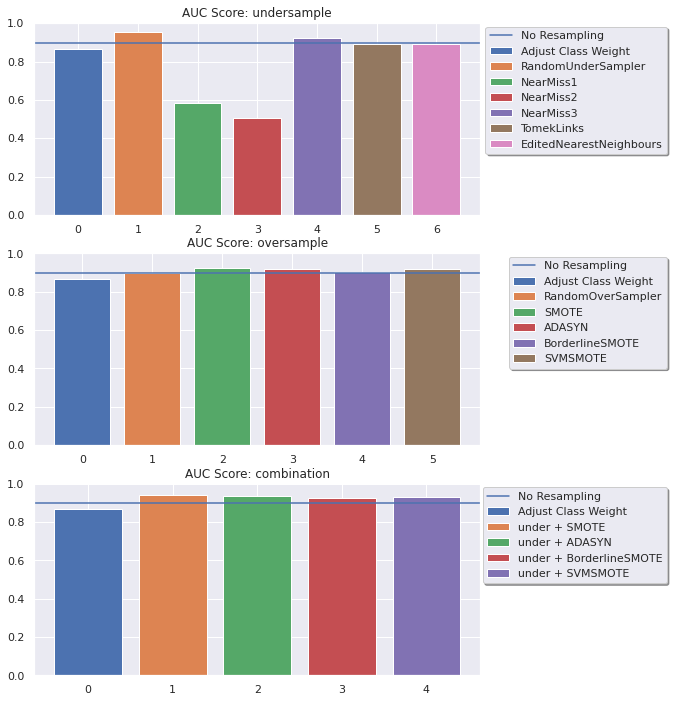

In [14]:
auc_plot(results_rf)

# 2. Use Monotonic constraint (partially) for Boosting.


##2.1 Data Preparation

In [15]:
import os
import time
import numpy as np
import pandas as pd
import xgboost as xgb
import lightgbm as lgb
import matplotlib.pyplot as plt
import sklearn.metrics as metrics
from copy import deepcopy
from sklearn.model_selection import train_test_split
from sklearn.datasets import fetch_california_housing


In [16]:
cal_housing = fetch_california_housing()
print(cal_housing.DESCR)

.. _california_housing_dataset:

California Housing dataset
--------------------------

**Data Set Characteristics:**

    :Number of Instances: 20640

    :Number of Attributes: 8 numeric, predictive attributes and the target

    :Attribute Information:
        - MedInc        median income in block group
        - HouseAge      median house age in block group
        - AveRooms      average number of rooms per household
        - AveBedrms     average number of bedrooms per household
        - Population    block group population
        - AveOccup      average number of household members
        - Latitude      block group latitude
        - Longitude     block group longitude

    :Missing Attribute Values: None

This dataset was obtained from the StatLib repository.
https://www.dcc.fc.up.pt/~ltorgo/Regression/cal_housing.html

The target variable is the median house value for California districts,
expressed in hundreds of thousands of dollars ($100,000).

This dataset was derived

In [17]:
df1 = pd.DataFrame(cal_housing.data)

df2 = pd.DataFrame(cal_housing.target)

df=pd.concat([df1,df2], axis=1)
df.columns = ['MedInc','HouseAge', 'AveRooms','AveBedrms', 'Population', 'AveOccup', 'Latitude', 'Longitude','Ln(MedVal)' ]
df

,MedInc,HouseAge,AveRooms,AveBedrms,Population,AveOccup,Latitude,Longitude,Ln(MedVal)
0,8.3252,41.0,6.984127,1.023810,322.0,2.555556,37.88,-122.23,4.526
1,8.3014,21.0,6.238137,0.971880,2401.0,2.109842,37.86,-122.22,3.585
2,7.2574,52.0,8.288136,1.073446,496.0,2.802260,37.85,-122.24,3.521
3,5.6431,52.0,5.817352,1.073059,558.0,2.547945,37.85,-122.25,3.413
4,3.8462,52.0,6.281853,1.081081,565.0,2.181467,37.85,-122.25,3.422
...,...,...,...,...,...,...,...,...,...
20635,1.5603,25.0,5.045455,1.133333,845.0,2.560606,39.48,-121.09,0.781
20636,2.5568,18.0,6.114035,1.315789,356.0,3.122807,39.49,-121.21,0.771
20637,1.7000,17.0,5.205543,1.120092,1007.0,2.325635,39.43,-121.22,0.923
20638,1.8672,18.0,5.329513,1.171920,741.0,2.123209,39.43,-121.32,0.847


The data contained 20,640 observations on 9 variables. The dependent variable is ln(median house value) and the feature variables include median house value, med ian income, housing median age, total rooms, total bedrooms, population, households, latitude, and longitude in order.


### Investigate Pair-wise Pearson Correlations 

In [18]:
# Pearson correlation between inputs and target
df.corr(method ='pearson')

,MedInc,HouseAge,AveRooms,AveBedrms,Population,AveOccup,Latitude,Longitude,Ln(MedVal)
MedInc,1.000000,-0.119034,0.326895,-0.062040,0.004834,0.018766,-0.079809,-0.015176,0.688075
HouseAge,-0.119034,1.000000,-0.153277,-0.077747,-0.296244,0.013191,0.011173,-0.108197,0.105623
AveRooms,0.326895,-0.153277,1.000000,0.847621,-0.072213,-0.004852,0.106389,-0.027540,0.151948
AveBedrms,-0.062040,-0.077747,0.847621,1.000000,-0.066197,-0.006181,0.069721,0.013344,-0.046701
Population,0.004834,-0.296244,-0.072213,-0.066197,1.000000,0.069863,-0.108785,0.099773,-0.024650
AveOccup,0.018766,0.013191,-0.004852,-0.006181,0.069863,1.000000,0.002366,0.002476,-0.023737
Latitude,-0.079809,0.011173,0.106389,0.069721,-0.108785,0.002366,1.000000,-0.924664,-0.144160
Longitude,-0.015176,-0.108197,-0.027540,0.013344,0.099773,0.002476,-0.924664,1.000000,-0.045967
Ln(MedVal),0.688075,0.105623,0.151948,-0.046701,-0.024650,-0.023737,-0.144160,-0.045967,1.000000


In [19]:
corr = df[df.columns[0:]].corr()['Ln(MedVal)'][:-1]
corr.columns = ['Pearson Correlation Coefficient']
corr

MedInc        0.688075
HouseAge      0.105623
AveRooms      0.151948
AveBedrms    -0.046701
Population   -0.024650
AveOccup     -0.023737
Latitude     -0.144160
Longitude    -0.045967
Name: Ln(MedVal), dtype: float64

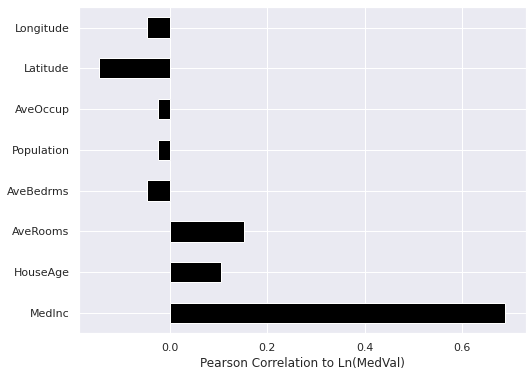

In [20]:
#Plot Pearson correlation to target as barchart
fig, ax_ = plt.subplots(figsize=(8, 6))
_ = corr.plot(kind='barh', ax=ax_, colormap='gnuplot')
_ = ax_.set_xlabel('Pearson Correlation to Ln(MedVal)')

This plot of Pearson correlation shows that the  MedInc, HouseAge, AveRooms features are positively correlated with Ln(MedVal), with median income in block group, MedInc, being the most correlated. This means that as MedInc,  HouseAge, AveRooms increase in value under a more complex model, the predicted log of median house value or ln(MedVal), should likely be expected to increase as well. 

All the other input features are negatively correlated with Ln(MedVal), meaning as their values increase, Ln(MedVal) should probably be expected to decrease under a more complex model. 

In [21]:
X_train, X_test, y_train, y_test = train_test_split(
    cal_housing.data,
    cal_housing.target,
    test_size=0.2,
    random_state=123
)

##2.2 XGBoost

To start, we use a single feature "the median income" to predict the house value. We first split the data into training and testing datasets. Then we use a 5-fold cross-validation and early-stopping on the training dataset to determine the best number of trees. Last we use the entire training set to train the model and evaluate its performance on the testset.

In [22]:
feature_names = ['MedInc','HouseAge', 'AveRooms','AveBedrms', 'Population', 'AveOccup', 'Latitude', 'Longitude']
feature_ids = [cal_housing.feature_names.index(f) for f in feature_names]

dtrain = xgb.DMatrix(X_train[:, feature_ids].reshape(len(X_train), len(feature_ids)), label = y_train)
dtest =  xgb.DMatrix(X_test[:, feature_ids].reshape(len(X_test), len(feature_ids)), label = y_test)

# Setting variable monotonicity constraints
# 0: no constraint, 1: positive, -1: negative
feature_monotones = [0] * (len(feature_names))
#feature_monotones = [1, -1, 1]

params = {'max_depth': 2,
          'eta': 0.1,
          'silent': 1,
          'nthread': 2,
          'seed': 0,
          'eval_metric': 'rmse',

          # E.g. fitting three features with positive, negative and no constraint
          # 'monotone_constraints': (1,-1,0)
          'monotone_constraints': '(' + ','.join([str(m) for m in feature_monotones]) + ')'
         }

# Use CV to find the best number of trees
bst_cv = xgb.cv(params, dtrain, 500, nfold = 5, early_stopping_rounds=10)

# Train on the entire training set, evaluate performances on the testset
evallist  = [(dtrain, 'train'), (dtest, 'eval')]
evals_result = {}
bst = xgb.train(params, dtrain, num_boost_round = bst_cv.shape[0], evals_result = evals_result, evals = evallist,  verbose_eval = False)

In [23]:
print ('Number of boosting rounds %d,\
       Training RMSE: %.4f, \
       Testing RMSE: %.4f' % \
       (
        len(evals_result['train']['rmse']),
        evals_result['train']['rmse'][-1],
        evals_result['eval']['rmse'][-1]
        ))

Number of boosting rounds 500,       Training RMSE: 0.4850,        Testing RMSE: 0.5028


### Feature Importance

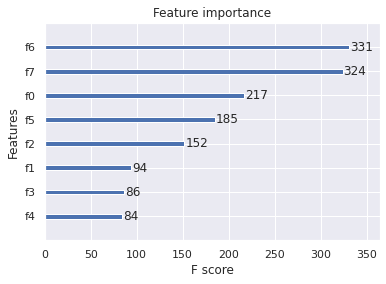

In [24]:
#Plot variable importance
_ = xgb.plot_importance(bst, ax=plt.gca())

We can also check the relationship between the feature (median income) and the dependent variable (median house value, house age, and average house occupancy):

In [25]:
def partial_dependency(bst, X, y, feature_ids = [], f_id = -1):

    """
    Calculate the dependency (or partial dependency) of a response variable on a predictor (or multiple predictors)
    1. Sample a grid of values of a predictor.
    2. For each value, replace every row of that predictor with this value, calculate the average prediction.
    """

    X_temp = X.copy()

    grid = np.linspace(np.percentile(X_temp[:, f_id], 0.1),
                       np.percentile(X_temp[:, f_id], 99.5),
                       50)
    y_pred = np.zeros(len(grid))

    if len(feature_ids) == 0 or f_id == -1:
        print ('Input error!')
        return
    else:
        for i, val in enumerate(grid):

            X_temp[:, f_id] = val
            data = xgb.DMatrix( X_temp[:, feature_ids].reshape( (len(X_temp), len(feature_ids)) ) )

            y_pred[i] = np.average(bst.predict(data, ntree_limit = bst.best_ntree_limit))

    return grid, y_pred

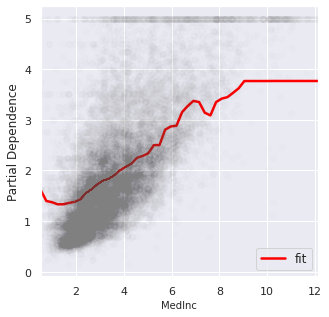

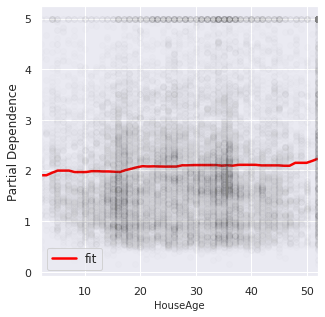

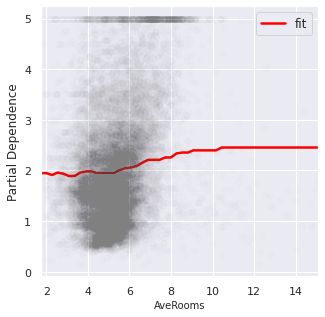

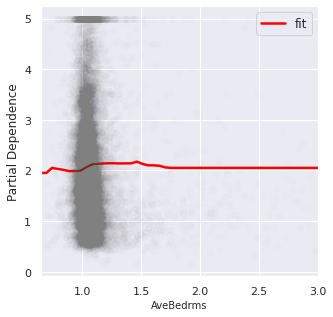

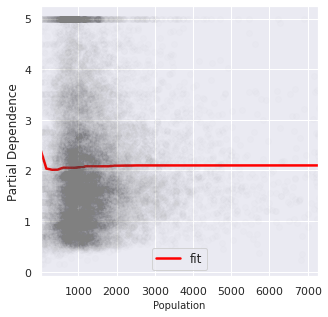

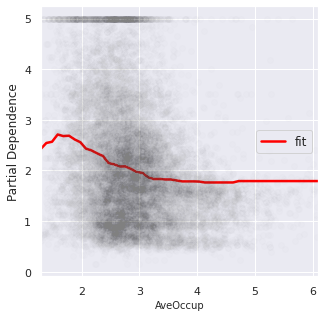

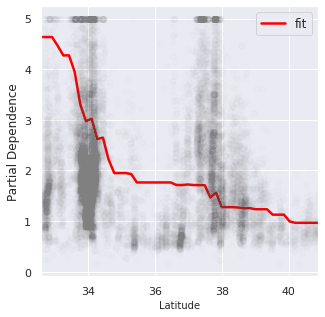

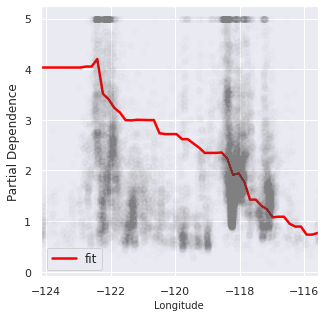

In [26]:
import matplotlib
import matplotlib.pyplot as plt
%matplotlib inline

for f in feature_names:

    grid, y_pred = partial_dependency(bst,
                                      X_train,
                                      y_train,
                                      feature_ids = feature_ids,
                                      f_id = cal_housing.feature_names.index(f)
                                     )

    fig, ax = plt.subplots()
    fig.set_size_inches(5, 5)
    plt.subplots_adjust(left = 0.17, right = 0.94, bottom = 0.15, top = 0.9)

    ax.plot(grid, y_pred, '-', color = 'red', linewidth = 2.5, label='fit')
    ax.plot(X_train[:, cal_housing.feature_names.index(f)], y_train, 'o', color = 'grey', alpha = 0.01)

    ax.set_xlim(min(grid), max(grid))
    ax.set_xlabel(f, fontsize = 10)
    ax.set_ylabel('Partial Dependence', fontsize = 12)
    handles, labels = ax.get_legend_handles_labels()
    ax.legend(handles, labels, loc = 'best', fontsize = 12)

We can see that at very low income and income around 10 (times its unit), the relationship between median income and median house value is not strictly monotonic.

##2.3 XGBoost Monotonic Constraint

The way to enforce monotonicity constraint in XGBoost is by passing the monotone_constraints parameter.

In [27]:
feature_names = ['MedInc','HouseAge', 'AveRooms','AveBedrms', 'Population', 'AveOccup', 'Latitude', 'Longitude']
feature_ids = [cal_housing.feature_names.index(f) for f in feature_names]

dtrain = xgb.DMatrix(X_train[:, feature_ids].reshape(len(X_train), len(feature_ids)), label = y_train)
dtest =  xgb.DMatrix(X_test[:, feature_ids].reshape(len(X_test), len(feature_ids)), label = y_test)


# Setting variable monotonicity constraints
# 0: no constraint, 1: positive, -1: negative
#feature_monotones = [0] * (len(feature_names))
feature_monotones = [1, 1, 1, 0, 0,-1,-1,-1]

params = {'max_depth': 2,
          'eta': 0.1,
          'silent': 1,
          'nthread': 2,
          'seed': 0,
          'eval_metric': 'rmse',

          # E.g. fitting three features with positive, negative and no constraint
          # 'monotone_constraints': (1,-1,0)
          'monotone_constraints': '(' + ','.join([str(m) for m in feature_monotones]) + ')'
         }

# Use CV to find the best number of trees
bst_cv = xgb.cv(params, dtrain, 500, nfold = 5, early_stopping_rounds=10)

# Train on the entire training set, evaluate performances on the testset
evallist  = [(dtrain, 'train'), (dtest, 'eval')]
evals_result = {}
bst = xgb.train(params, dtrain, num_boost_round = bst_cv.shape[0], evals_result = evals_result, evals = evallist,  verbose_eval = False)


In [28]:
print ('Number of boosting rounds %d,\
       Training RMSE: %.4f, \
       Testing RMSE: %.4f' % \
       (
        len(evals_result['train']['rmse']),
        evals_result['train']['rmse'][-1],
        evals_result['eval']['rmse'][-1]
        ))

Number of boosting rounds 431,       Training RMSE: 0.5253,        Testing RMSE: 0.5300


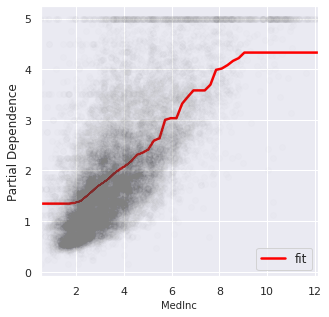

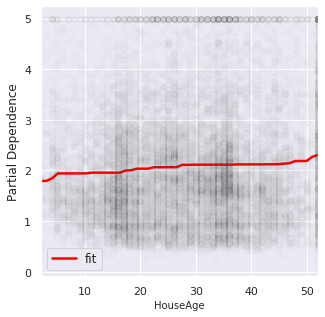

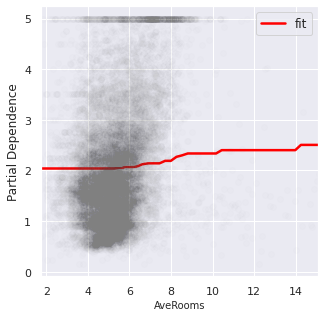

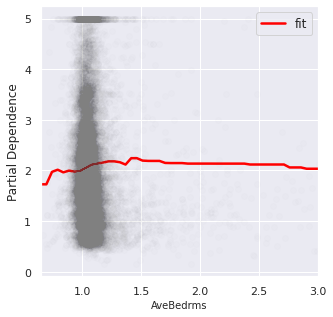

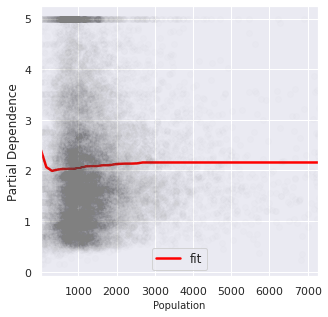

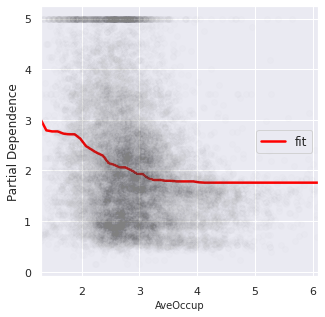

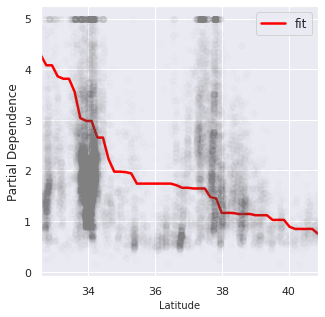

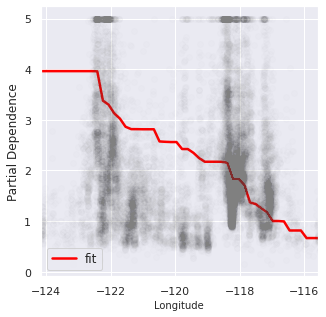

In [29]:
import matplotlib
import matplotlib.pyplot as plt
%matplotlib inline

for f in feature_names:

    grid, y_pred = partial_dependency(bst,
                                      X_train,
                                      y_train,
                                      feature_ids = feature_ids,
                                      f_id = cal_housing.feature_names.index(f)
                                     )

    fig, ax = plt.subplots()
    fig.set_size_inches(5, 5)
    plt.subplots_adjust(left = 0.17, right = 0.94, bottom = 0.15, top = 0.9)

    ax.plot(grid, y_pred, '-', color = 'red', linewidth = 2.5, label='fit')
    ax.plot(X_train[:, cal_housing.feature_names.index(f)], y_train, 'o', color = 'grey', alpha = 0.01)

    ax.set_xlim(min(grid), max(grid))
    ax.set_xlabel(f, fontsize = 10)
    ax.set_ylabel('Partial Dependence', fontsize = 12)
    handles, labels = ax.get_legend_handles_labels()
    ax.legend(handles, labels, loc = 'best', fontsize = 12)

It will be a tuple-like string where 1 indicates an increasing constraint, 0 indicates no constraint and -1 indicates a decreasing constraint. We assume that median house value is positively correlated with median income, house age and average number of rooms, no constraints for AveBedrms and Population, but negatively correlated with average house occupancy, lattitude and longitude.

After applying the monotonic constraint parameter, the response is now monotonically increasing with the predictor.

So was it a good idea to enforce monotonicity constraints on features? it depends. For the example here:
*   Performance-wise: We didn't see a significant performance decrease on the 
test set after applying the constraint.
*   Interpretation-wise: It is up to our domain knowledge and see whether enforcing monotonic relationship makes intuitive sense. \\

One can view monotonic constraint a type of regularization and it is upon us, the end user, to fit a model that is as simple as possible, but no simpler.